In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

## Part I: Logistic Regression Model:

### A.  Bring the dataset bank_churn.csv into your environment

Dataset contains information about bank customers, including a categorical variable to indicate whether they left the company (Exited).

In [2]:
bank = pd.read_csv('bank_churn.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- identity number: unique identifier for each customer
- surname:  last name
- CreditScore:  most recent estimate of the customer's FICO credit score 
- Geography: the customer's home country
- Gender: Male or female
- Age: customer age
- Tenure: How long, in years, has the customer been with the bank?
- Balance: Total deposited amount across all the customer's accounts (in USD)	
- NumOfProducts: Number of unique products (e.g. savings account, checking account, certificate of deposit) held by the customer at this bank
- HasCrCard: Does the customer have a credit card with this bank?  (1 = yes, 0 = no)
- IsActiveMember: Does the customer login to the online site and/or visit a bank branch, on average, more than four times per month, across the past year? (A "1" means the customer is active, whereas a "0" means that the customer is inactive)
- EstimatedSalary:	Bank's estimate of the customer's salary 
- Exited:A categorical variable to indicate whether the customer left the bank during the time period studied.  A "1" means the customer left, whereas a "0" means that the customer did not leave.

In [3]:
bank.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### B. Which of the variables here are categorical? Which are numerical?

- Categorical variables : `CustomerId`, `Surname`, `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`,`Exited`
- Numerical variables : rest of the variables

### C. Use the value_counts() function from pandas to learn more about the outcome variable, ‘Exited’

In [4]:
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

a. The binary variable `Exited` shows whether the customer has left the company or not. 7963 customers have left the company (Exited=0) and 2037 have not (Exited =1).

b. When one class of the responses has significantly fewer instances than the other, we use the 'oversampling' technique to address this imbalanced dataset. To balance the class distribution in the dataset, we can add more observations to the minority class in the training set. 

### D. Categories and uniqueness

In [5]:
bank.shape

(10000, 14)

In [6]:
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

a. We can confirm that `RowNumber` and `CustomerID` contain only distinct values.

In [7]:
#eliminate the two columns
bank.drop('RowNumber', axis=1, inplace=True)
bank.drop('CustomerId', axis=1, inplace=True)
bank.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


b. `Surname` has a lot of unique values more than 100 unique values.

In [8]:
#eliminate Surname
bank.drop('Surname', axis=1, inplace=True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


c. The model will not be able to find any relationships with categorical variables with many unique values.  Because categorical variables do not have a numerical scale or inherent order, it can be challenging to identify patterns or trends from them.

### E. Missing Values

In [9]:
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values.

### F. Examining correlations

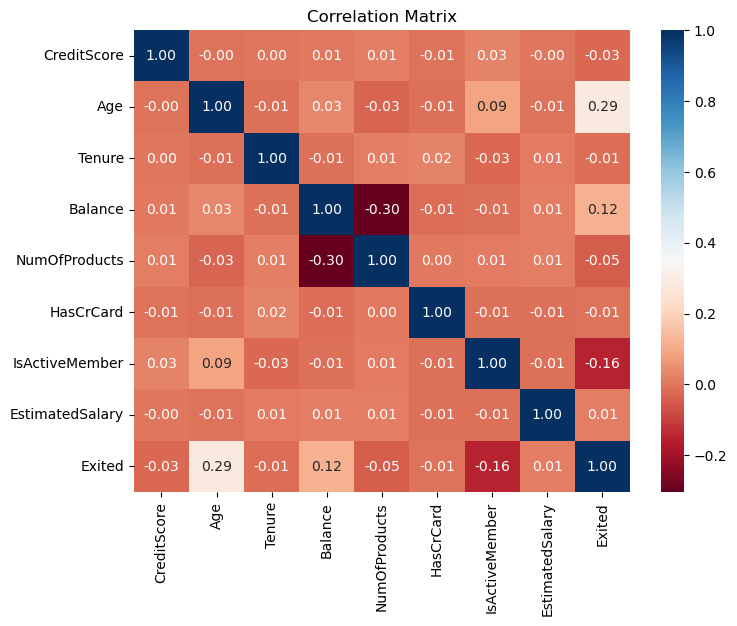

In [10]:
# a. Build a correlation table 
plt.figure(figsize=(8, 6))
sns.heatmap(bank.corr(), annot=True, cmap='RdBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

a.i. There are no high correlations that we need to worry about the multicollinearity problem.

### G. For any variables that need further treatment, dummify them

In [11]:
bank_dum = pd.get_dummies(bank, columns=['Geography', 'Gender'], drop_first = True)
bank_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### H. Create a data partition

In [12]:
np.random.seed(806)

X = bank_dum.drop('Exited', axis=1)  #variables except 'Exited'
y = bank_dum['Exited'] #dependent variable

# Split the data into training and testing sets: 40% to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=806)

a. The seed value 806 is from my birth day, August 6th.

#### I. Compare the mean values of the variables in the dataset after grouping by Exited

In [13]:
bank_dum.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
Exited,,,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.212859,0.259199,0.572523
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.399607,0.202749,0.440844


a. `Balance`, `IsActiveMember` and `EstimatedSalary` seem to have the largest gaps between the two groups. We can hypothesize that the significant range of these three variables most likely contribute the most to the outcome, which is binary. It isn't intuitive to think variables that are similar in distribution contribute to the outcome, therefore we select the variables that possibly differ the most between the two responses.

### Iteration #1

### J. Build a logistic regression model

In [14]:
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.438080
         Iterations 6


#### K. Show the summary of your model with log_reg.summary()

In [15]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5989
Method:                           MLE   Df Model:                           10
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.1290
Time:                        01:07:29   Log-Likelihood:                -2628.5
converged:                       True   LL-Null:                       -3017.6
Covariance Type:            nonrobust   LLR p-value:                9.778e-161
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0037      0.000    -15.151      0.000      -0.004      -0.003
Age                   0.0574      0.003     19.274      0.000       0.052       0.063
Tenure               -0.0229      0.012     -1.957      0.050      -0.046    3.15e-05
Balance            8.499e-07   6.44e-07      1.320      0.187   -4.12e-07    2.11e-06
NumOfProducts        -0.3443      0.058     -5.922      0.000      -0.458      -0.230
HasCrCard            -0.2184      0.074     -2.958      0.003      -0.363      -0.074
IsActiveMember       -1.0521      0.073    -14.443      0.000      -1.195      -0.909
EstimatedSalary    8.277e-09   5.95e-07      0.014      0.989   -1.16e-06    1.17e-06
Geography_Germany     0.7406      0.087      8.487      0.000       0.570       0.912
Geography_Spain      -0.0594      0.090     -0.663      0.508      -0.235       0.116
Gender_Male          -0.5866      0.069     -8.503      0.000      -0.722      -0.451
=====================================================================================
"""

a. Assuming an alpha value of 0.05, `Tenure`, `Balance`and `EstimatedSalary` display high p-values.

b. None of them has high p-values.

### Iteration #2

### L. Build yet another model but drop the ones you identified in the previous step for parts (a) and (b).

In [16]:
X_train_2 = X_train.drop('Balance', axis=1)
X_train_2 = X_train_2.drop('Tenure', axis=1)
X_train_2 = X_train_2.drop('EstimatedSalary', axis=1)
logit_model_two = sm.Logit(y_train, X_train_2).fit()

Optimization terminated successfully.
         Current function value: 0.438524
         Iterations 6


In [17]:
# a.
logit_model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5992
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.1281
Time:                        01:07:29   Log-Likelihood:                -2631.1
converged:                       True   LL-Null:                       -3017.6
Covariance Type:            nonrobust   LLR p-value:                1.299e-162
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0038      0.000    -16.724      0.000      -0.004      -0.003
Age                   0.0572      0.003     19.395      0.000       0.051       0.063
NumOfProducts        -0.3691      0.056     -6.554      0.000      -0.480      -0.259
HasCrCard            -0.2228      0.074     -3.029      0.002      -0.367      -0.079
IsActiveMember       -1.0456      0.073    -14.377      0.000      -1.188      -0.903
Geography_Germany     0.7850      0.079      9.889      0.000       0.629       0.941
Geography_Spain      -0.0588      0.089     -0.657      0.511      -0.234       0.117
Gender_Male          -0.5874      0.069     -8.540      0.000      -0.722      -0.453
=====================================================================================
"""

b. None of the numeric variables diplay a high p-value, assuming an alpha value of 0.05. 

c. Assuming an alpha value of 0.01, `HasCrCard` has high p-value.

### M. 

I would keep this model.

### N. Using scikit-learn, build another version of your model

In [18]:
# Initialize the logistic regression model
logit_model_scikit = LogisticRegression()

# Fit the logistic regression model to the training data
logit_model_scikit.fit(X_train_2, y_train)

/Users/jiunlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### O. Assess the performance of your model against the test set

In [19]:
X_test_2 = X_test.drop('Balance', axis=1)
X_test_2 = X_test_2.drop('Tenure', axis=1)
X_test_2 = X_test_2.drop('EstimatedSalary', axis=1)
y_pred_scikit = logit_model_scikit.predict(X_test_2)

In [20]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_scikit)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[3073  101]
 [ 665  161]]


In [21]:
# calculate other metrics
total_samples = len(y_test)
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_pred_scikit)
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, y_pred_scikit)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_scikit)

print("a. Accuracy:", accuracy)
print("b. Sensitivity:", sensitivity)
print("c. Specificity:", specificity)
print("d. Precision:", precision)
print("e. Balanced Accuracy:", balanced_accuracy)

a. Accuracy: 0.8085
b. Sensitivity: 0.19491525423728814
c. Specificity: 0.9681789540012602
d. Precision: 0.6145038167938931
e. Balanced Accuracy: 0.5815471041192741


### P. Compare your model’s accuracy against the training set vs. accuracy against the test set 

In [22]:
y_train_pred_scikit = logit_model_scikit.predict(X_train_2)
accuracy_train = accuracy_score(y_train, y_train_pred_scikit)
print("Accuracy on the training set is:", accuracy_train)

Accuracy on the training set is: 0.8131666666666667


a. Accuracy on the training set is 0.813, and Accuracy on the test set is 0.8085.
We evaluate machine learning model performance by comparing accuracy on both training and test sets, detecting potential overfitting and underfitting.

b. There is little difference in accuracy rates, both of which are high. This suggests that the model is performing well without overfitting problems.

### Q. Make up a bank customer

In [23]:
X_test_2

,CreditScore,Age,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
452,592,31,1,0,0,0,1,1
9871,633,34,2,1,1,0,0,0
8356,731,26,2,1,0,0,1,0
6944,850,36,1,1,1,1,0,1
1390,653,27,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...
788,562,35,2,1,0,0,1,0
8767,552,29,2,1,0,0,0,1
6997,611,68,2,1,1,0,0,1
1992,613,29,2,1,1,0,0,0


In [24]:
a = {
    'CreditScore': 500,
    'Age': 50,
    'NumOfProducts':0,
    'HasCrCard':1,
    'IsActiveMember':0,
    'Geography_Germany':0,
    'Geography_Spain':0,
    'Gender_Male':0
}
fake = pd.DataFrame([a])

In [25]:
# use model
print(logit_model_scikit.predict(fake))
print('prob_stay' , '   prob_exit')
print(logit_model_scikit.predict_proba(fake))

[1]
prob_stay    prob_exit
[[0.47208186 0.52791814]]


a. The model predicts that customer is likely to leave.

b. The probabilty that the employee will leave is 0.52791814

### R. When using a logistic regression model to make predictions, why is it important to only use values within the range of the dataset used to build the model?

In [26]:
b = {
    'CreditScore': 1000,
    'Age': 2,
    'NumOfProducts':0,
    'HasCrCard':1,
    'IsActiveMember':0,
    'Geography_Germany':0,
    'Geography_Spain':0,
    'Gender_Male':0
}
fake_2 = pd.DataFrame([b])

In [27]:
print(logit_model_scikit.predict(fake_2))
print('prob_stay' , '   prob_exit')
print(logit_model_scikit.predict_proba(fake_2))

[0]
prob_stay    prob_exit
[[0.9783231 0.0216769]]


a. When a model is given values outside its range, it predicts extreme outcomes with high probability. The model predicted that the customer would not exit, with a 97.8% probability.


## Part II: Random Forest Model

### S. Read the dataset back into Python.

### T. Dummify the categorical inputs again, but this time, don’t drop any levels.

In [28]:
bank_dum = pd.get_dummies(bank,columns=['Geography', 'Gender'])
bank_dum.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### U. Re-partition the data using the same seed value that you used in the previous part 

In [29]:
np.random.seed(806)

X = bank_dum.drop('Exited', axis=1)  
y = bank_dum['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=806)

### V. Build a random forest model

In [30]:
rf_model = RandomForestClassifier(random_state=806)

param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [10,11],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:\n", best_params)

best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Model:\n", best_rf_model)

Best Hyperparameters:
 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Best Random Forest Model:
 RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=806)


In [31]:
# Define the hyperparameters based on grid search results
n_estimators = 100
max_depth = None
min_samples_split = 10
min_samples_leaf = 2

# Create the Random Forest model with specified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=806
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=806)

### W. Variable rank in order of importance 

In [32]:
feature_importances = rf_model.feature_importances_

# DataFrame showing feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,Age,0.291795
4,NumOfProducts,0.171462
3,Balance,0.119652
0,CreditScore,0.110770
7,EstimatedSalary,0.108563
2,Tenure,0.060453
6,IsActiveMember,0.056177
9,Geography_Germany,0.028624
5,HasCrCard,0.012833
12,Gender_Male,0.010403


The ranking above indicates the significance of each variable based on its importance, with `Age` being the most influential and `Gender_Female` the least. Variables with higher importance scores contribute more effectively to the model's predictive accuracy. Essentially, these variables play a crucial role in shaping the model's outcomes.

### X. Assess the performance of your model against the test set. 

In [33]:
# predict on test set
rf_model_pred = rf_model.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, rf_model_pred)
print("Confusion Matrix:")
print(conf_matrix)

# calculate other metrics
total_samples = len(y_test)
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, rf_model_pred)
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, rf_model_pred)
balanced_accuracy = balanced_accuracy_score(y_test, rf_model_pred)

print("a. Accuracy:", accuracy)
print("b. Sensitivity:", sensitivity)
print("c. Specificity:", specificity)
print("d. Precision:", precision)
print("e. Balanced Accuracy:", balanced_accuracy)

Confusion Matrix:
[[3081   93]
 [ 455  371]]
a. Accuracy: 0.863
b. Sensitivity: 0.4491525423728814
c. Specificity: 0.9706994328922496
d. Precision: 0.7995689655172413
e. Balanced Accuracy: 0.7099259876325654


This is the metrics for the random forest model.

### Y. Compare model’s accuracy against the training set vs. your model’s accuracy against the test set

In [34]:
rf_model_train = rf_model.predict(X_train)
accuracy_train = accuracy_score(y_train, rf_model_train)
print("Accuracy on the training set:", accuracy_train)

Accuracy on the training set: 0.92


The accuracy for the training set is 0.92. The accuracy for the test set is 0.863. The accuracy for the training set is slightly more than the test set.

#### Z. Classify the made up customer from the previous question. 

In [35]:
a = {
    'CreditScore': 500,
    'Age': 50,
    'Tenure': 0,
    'Balance':30000,
    'NumOfProducts':0,
    'HasCrCard':1,
    'IsActiveMember':0,
    'EstimatedSalary':15000,
    'Geography_France':1,
    'Geography_Germany':0,
    'Geography_Spain':0,
    'Gender_Female':1,
    'Gender_Male':0
}


fake = pd.DataFrame([a])


print(rf_model.predict(fake))
print('prob_stay' , '   prob_exit')
rf_model.predict(fake)
print(rf_model.predict_proba(fake))

[1]
prob_stay    prob_exit
[[0.4222474 0.5777526]]


The model predicts that the customer will leave with a possibility of 0.58.

### AA

In [36]:
logit_model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5992
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.1281
Time:                        01:07:43   Log-Likelihood:                -2631.1
converged:                       True   LL-Null:                       -3017.6
Covariance Type:            nonrobust   LLR p-value:                1.299e-162
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0038      0.000    -16.724      0.000      -0.004      -0.003
Age                   0.0572      0.003     19.395      0.000       0.051       0.063
NumOfProducts        -0.3691      0.056     -6.554      0.000      -0.480      -0.259
HasCrCard            -0.2228      0.074     -3.029      0.002      -0.367      -0.079
IsActiveMember       -1.0456      0.073    -14.377      0.000      -1.188      -0.903
Geography_Germany     0.7850      0.079      9.889      0.000       0.629       0.941
Geography_Spain      -0.0588      0.089     -0.657      0.511      -0.234       0.117
Gender_Male          -0.5874      0.069     -8.540      0.000      -0.722      -0.453
=====================================================================================
"""

In [37]:
import math
print(math.exp(-0.0038)) #CreditScore
print(math.exp(0.0572)) #Age
print(math.exp(-0.3691)) #NumOfProducts
print(math.exp(-0.2228)) #HasCrCard
print(math.exp(-1.0456)) #IsActiveMember
print(math.exp(0.7850)) #Geography_Germany
print(math.exp(-0.0588)) #Geography_Spain
print(math.exp(-0.5874)) #Gender_Male

0.9962072108633482
1.058867562732107
0.6913562713662753
0.8002748882677769
0.3514808675783085
2.192406940733216
0.9428953293663236
0.5557704109259045


The bank can use this logistic regression model to predict the customer's possibility of exit. The odds for customers to exit are 119% higher for customers living in Germany. However, the odds for customers to exit are 6% less for customers living in Spain than in France. 
Based on this prediction, the bank could prioritize its efforts towards retaining its customer base in Spain, while not expending as much resources on customers residing in Germany.

## Part III: Wildcard

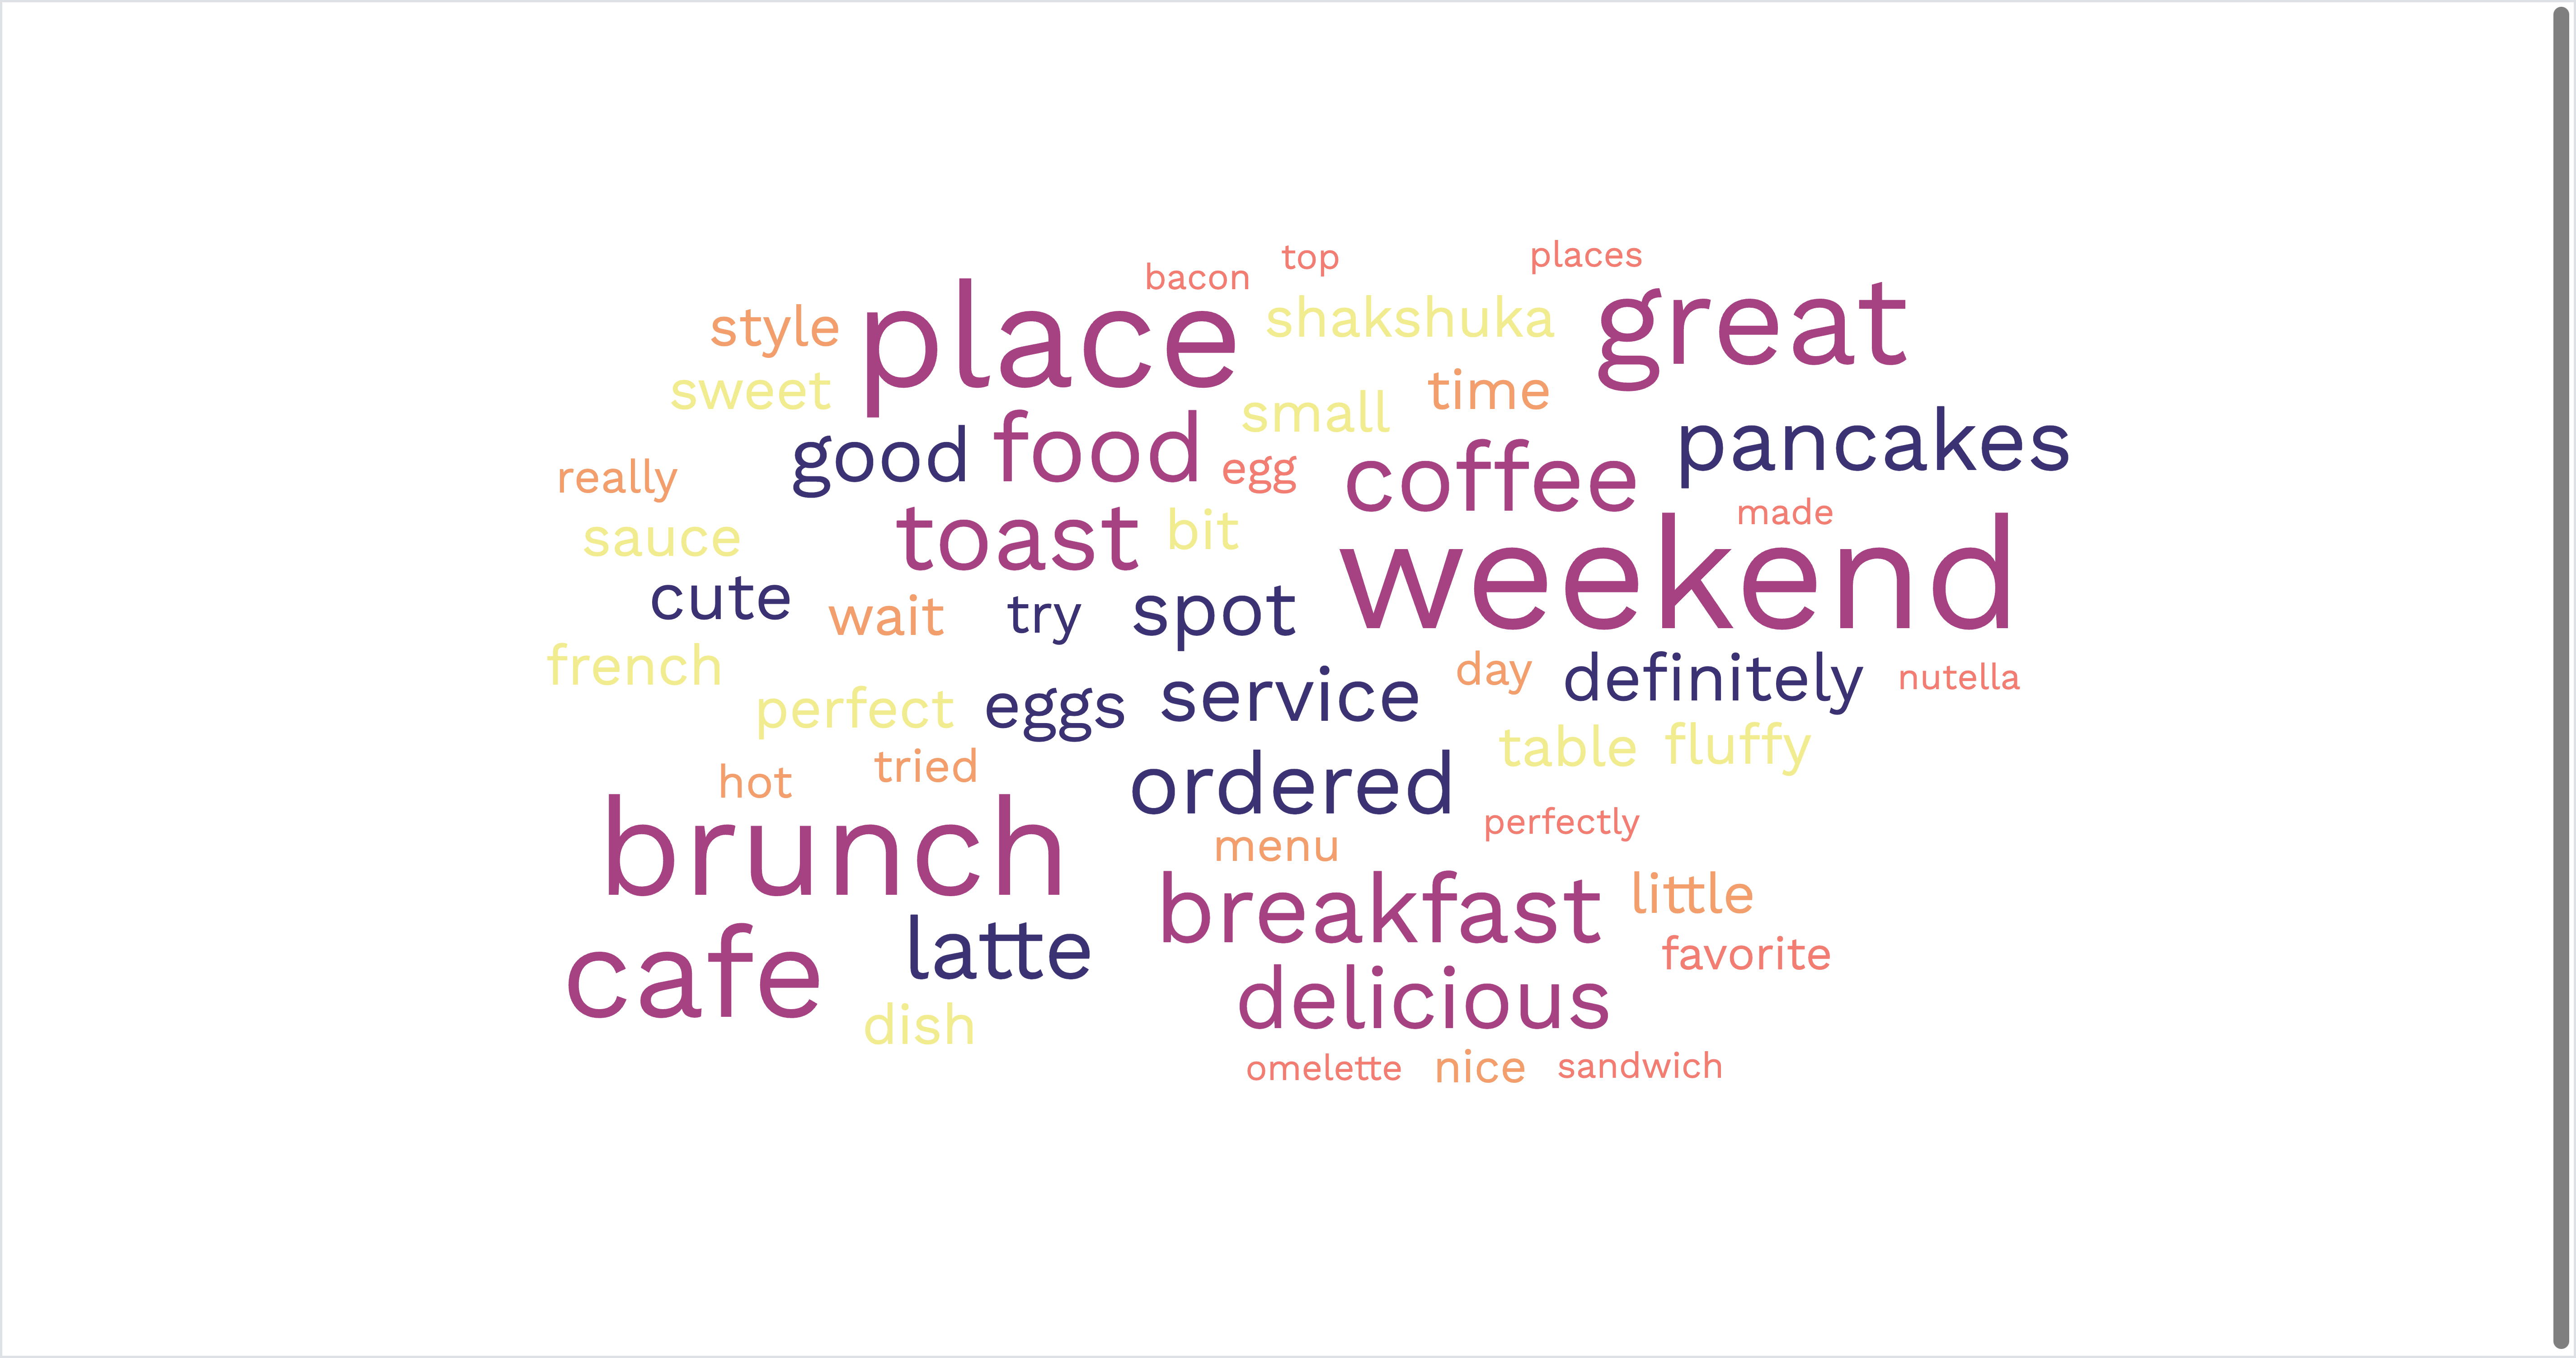

In [39]:
PATH = "/Users/jiunlee/Documents/Fall_23/MarketingAnalytics/Assignment3/word-cloud.png"
from IPython.display import Image
Image(filename = PATH, width=75000, height=500)

This is a WordCloud from the reviews of "Cafe Weekend" in Yelp. The Cafe Weekend is a Korean-style brunch cafe, my favorite cafe in Allston. In the word cloud, we can see the big words indicating that it's a brunch cafe offering delicious breakfasts like pancakes, toast, and good coffee. Also, There are a lot of positive words, such as "cute," "good," "great," favorite," and so on. The overall rating of the Yelp reviews was 4.5/5, which is a high rating, and it seems like WordCloud reflected those excellent comments.